In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from utils import import_data, get_accuracy, get_accuracy_by_cue, plot_accuracy, plot_accuracy_by_cue, save_fig
from supplemental_data import rule_change, cscheme, cue_names

# Import data
Specify the list of all animals and the directory the csv files are. Choose a subset of animals to work with.

In [2]:
all_animals = [
    'JC240',
    'JC241',
    'JC258',
    'JC267',
    'JC274',
    'JC283',
]

datadir = 'data/'

animals = all_animals[2:]

Import animal data and store them in a dict under animal name.

In [49]:
data = {}

for animal in animals:
    data[animal] = import_data(datadir,
                               animal)

Get the number of training days for each animal.

In [50]:
sessions = {}

for animal in animals:
    sessions[animal] = data[animal]['Session_ID'].unique()

Calculate the accuracy for each training day.

In [51]:
accuracy = {}

for animal in animals:
    accuracy[animal] = get_accuracy(data,
                                    animal)

Get the unique food cues for each experiment. Calculate the accuracy by training day and food cue type.

In [6]:
cues = {}
accuracy_by_cue = {}

for animal in animals:
    cues[animal] = data[animal]['Flavor'].unique()
    accuracy_by_cue[animal] = get_accuracy_by_cue(data,
                                                  animal)

In [34]:
df = data[animal] # call the dataframe for that animal
df
    

,Session_ID,Flavor,Arm,Correct,CorrectBool
0,1,H,2,N,0
1,1,H,2,N,0
2,1,H,1,N,0
3,1,H,5,N,0
4,1,H,8,N,0
5,1,H,4,N,0
6,1,C,3,Y,1
7,1,C,7,N,0
8,1,C,4,N,0
9,1,C,5,N,0


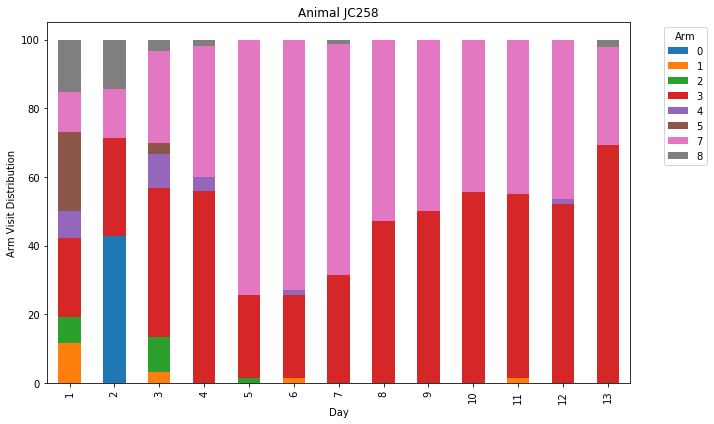

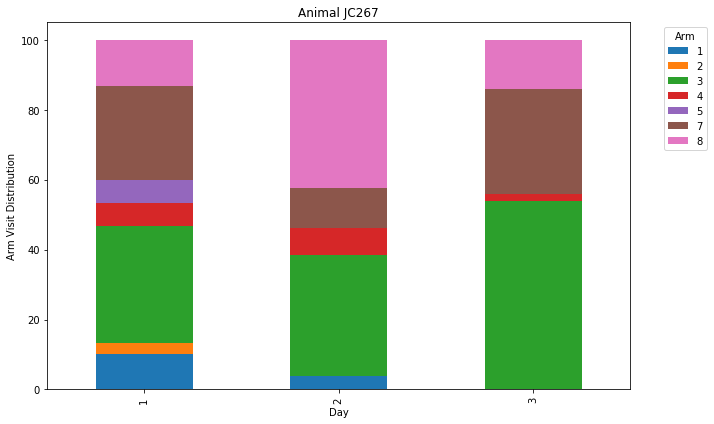

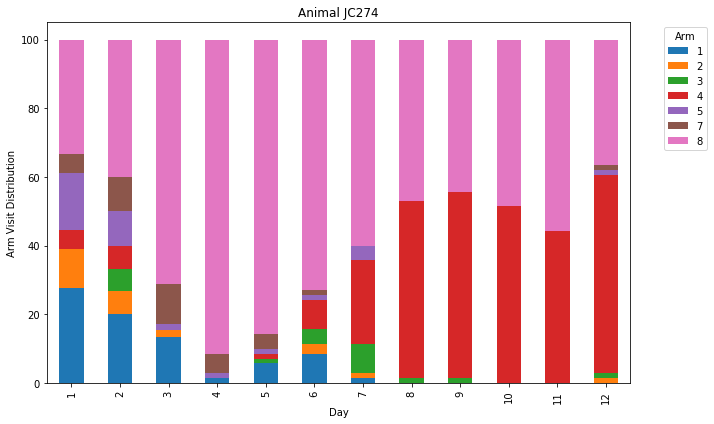

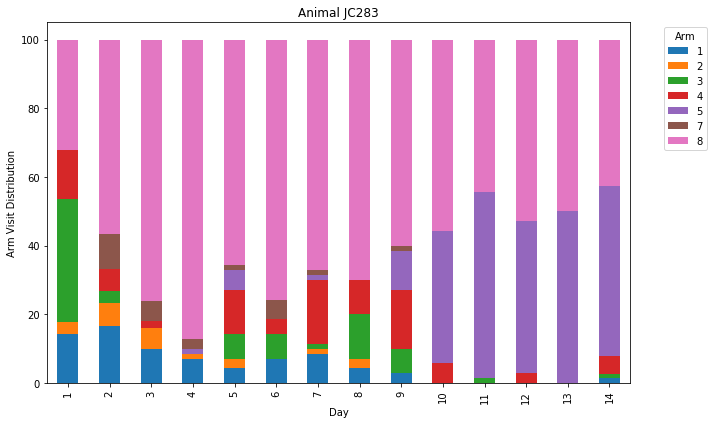

In [53]:
for animal in animals:
    df = data[animal]
    # Pivot the DataFrame to get arm distribution by session_id
    pivot_df = pd.pivot_table(df, index='Session_ID', columns='Arm', aggfunc='size', fill_value=0)

    # Calculate row-wise percentages
    row_sums = pivot_df.sum(axis=1)
    percentage_df = pivot_df.div(row_sums, axis=0) * 100

    # Create a stacked bar plot of percentages
    ax = percentage_df.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Set plot labels and title
    plt.xlabel('Day')
    plt.ylabel('Arm Visit Distribution')
    plt.title('Animal ' + animal)

    # Show the plot
    plt.legend(title='Arm', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


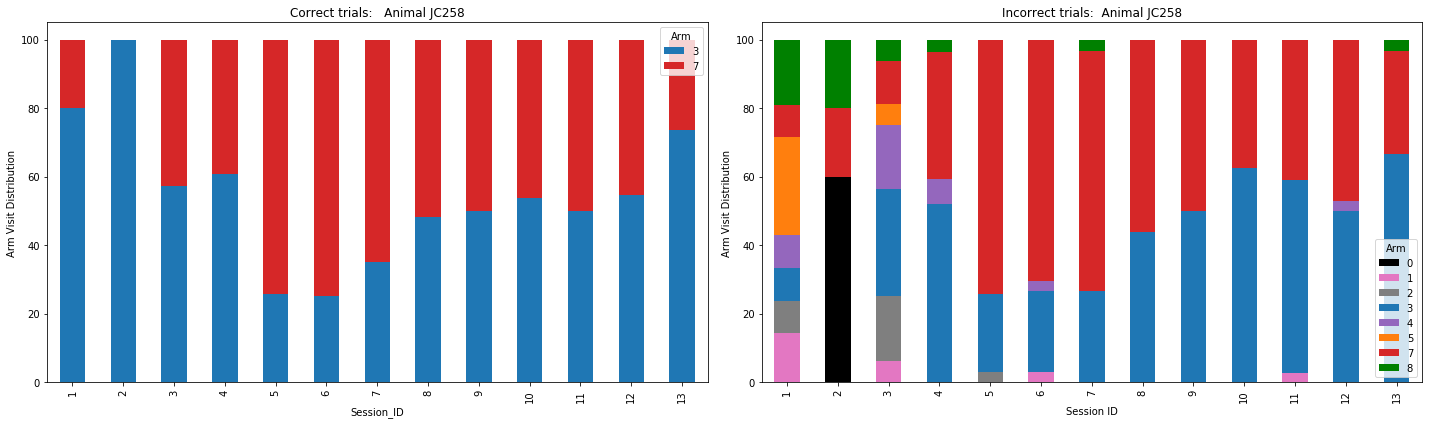

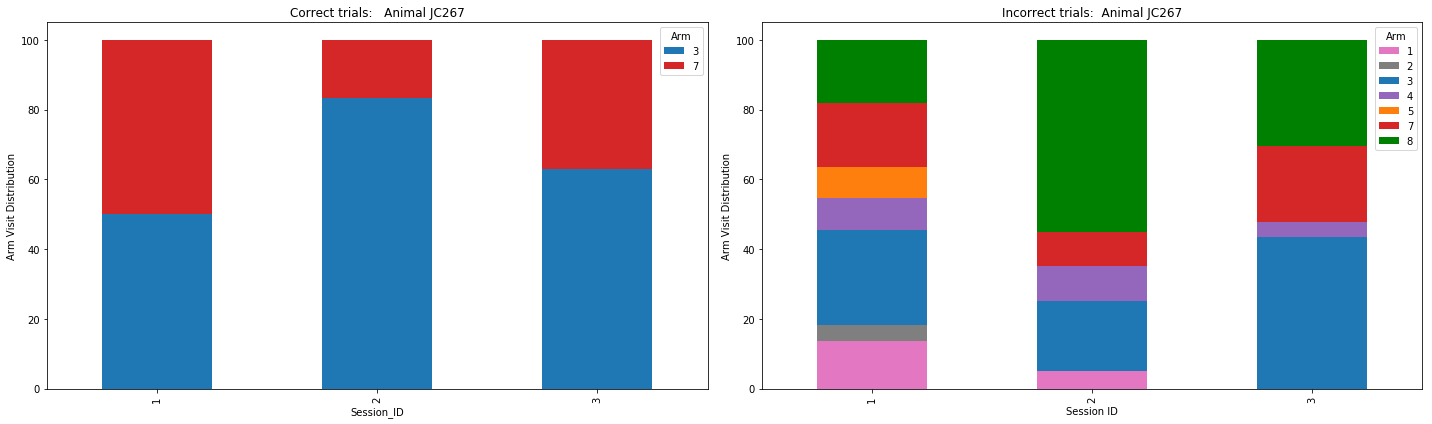

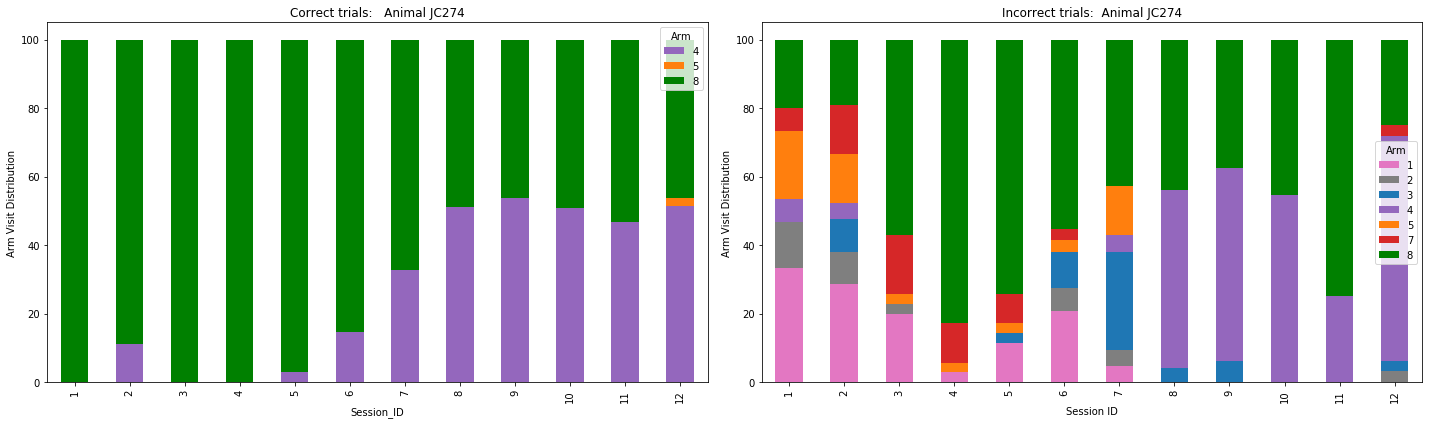

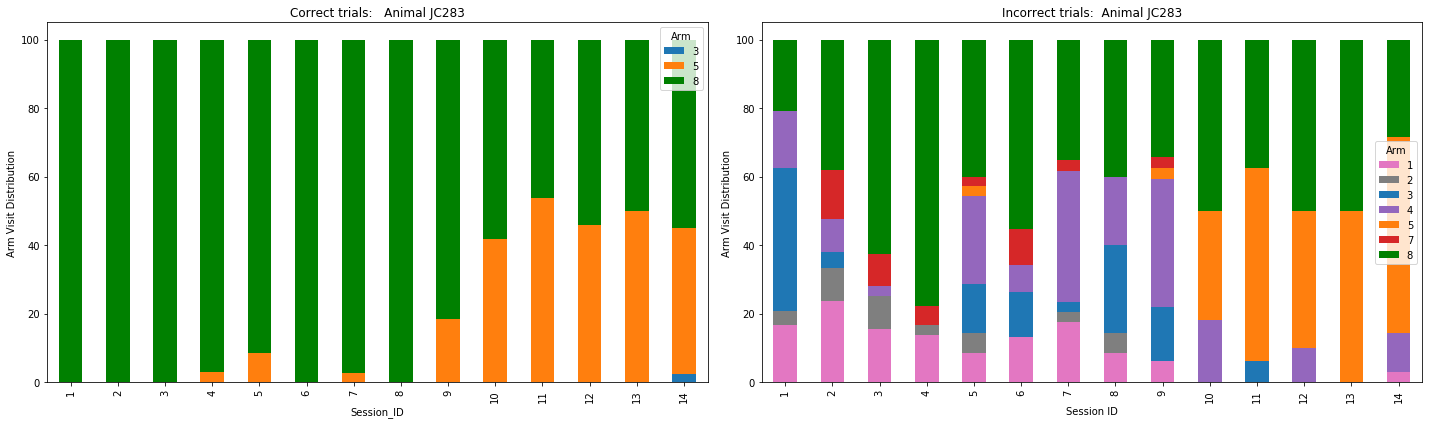

In [72]:
for animal in animals:
    df = data[animal]

    # Create two subplots, one for each 'correct' value
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharex=True)
    
    # Create a custom color mapping for arm numbers
    arm_colors = {1: 'tab:pink', 2: 'tab:gray', 3: 'tab:blue', 4: 'tab:purple', 5: 'tab:orange', 6: 'tab:brown', 7: 'tab:red', 8: 'green'}


    # Plot for correct=1
    correct_1_df = df[df['CorrectBool'] == 1]
    pivot_df_correct_1 = pd.pivot_table(correct_1_df, index='Session_ID', columns='Arm', aggfunc='size', fill_value=0)
    pivot_df_correct_1_percentage = pivot_df_correct_1.div(pivot_df_correct_1.sum(axis=1), axis=0) * 100
    pivot_df_correct_1_percentage.plot(kind='bar', stacked=True, ax=axes[0], color=[arm_colors.get(x, 'black') for x in pivot_df_correct_1_percentage.columns])
    axes[0].set_ylabel('Arm Visit Distribution')
    axes[0].set_title('Correct trials:   Animal '+animal)

    # Plot for correct=0
    correct_0_df = df[df['CorrectBool'] == 0]
    pivot_df_correct_0 = pd.pivot_table(correct_0_df, index='Session_ID', columns='Arm', aggfunc='size', fill_value=0)
    pivot_df_correct_0_percentage = pivot_df_correct_0.div(pivot_df_correct_0.sum(axis=1), axis=0) * 100
    pivot_df_correct_0_percentage.plot(kind='bar', stacked=True, ax=axes[1], color=[arm_colors.get(x, 'black') for x in pivot_df_correct_0_percentage.columns])
    axes[1].set_ylabel('Percentage')
    axes[1].set_ylabel('Arm Visit Distribution')
    axes[1].set_title('Incorrect trials:  Animal '+animal)

    plt.xlabel('Session ID')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.show()


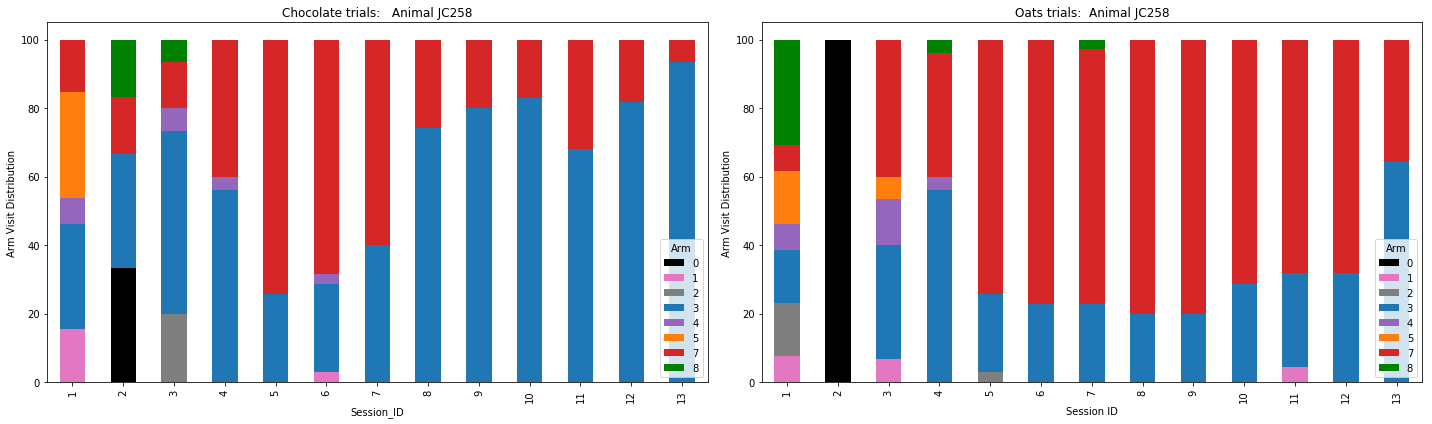

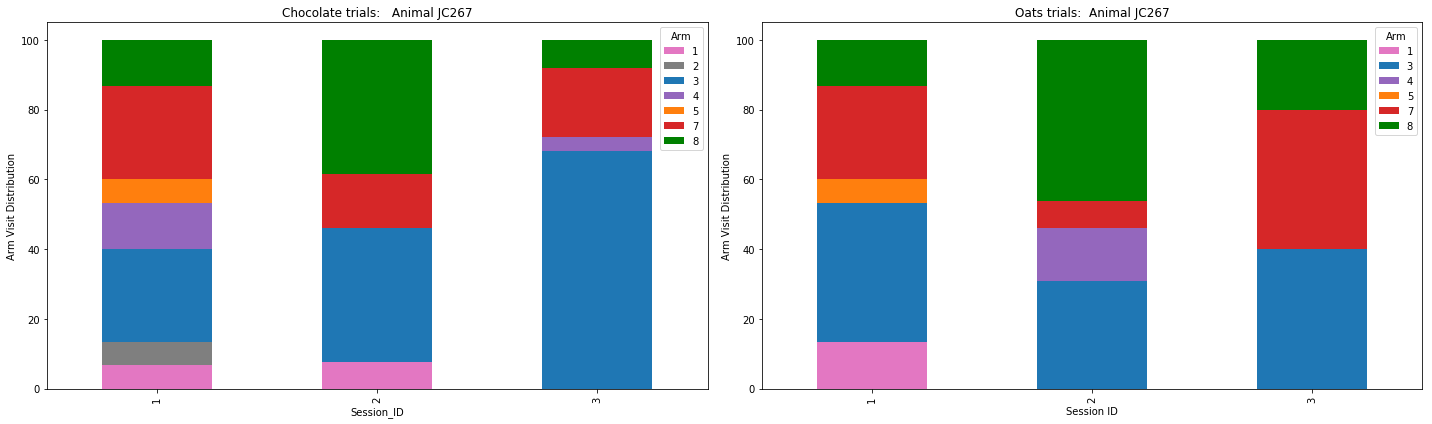

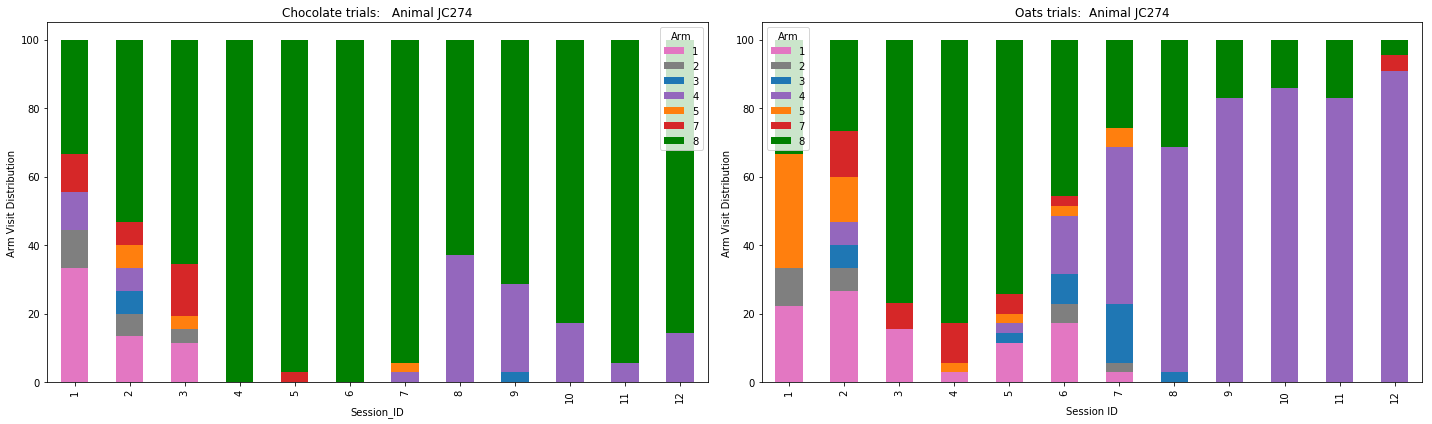

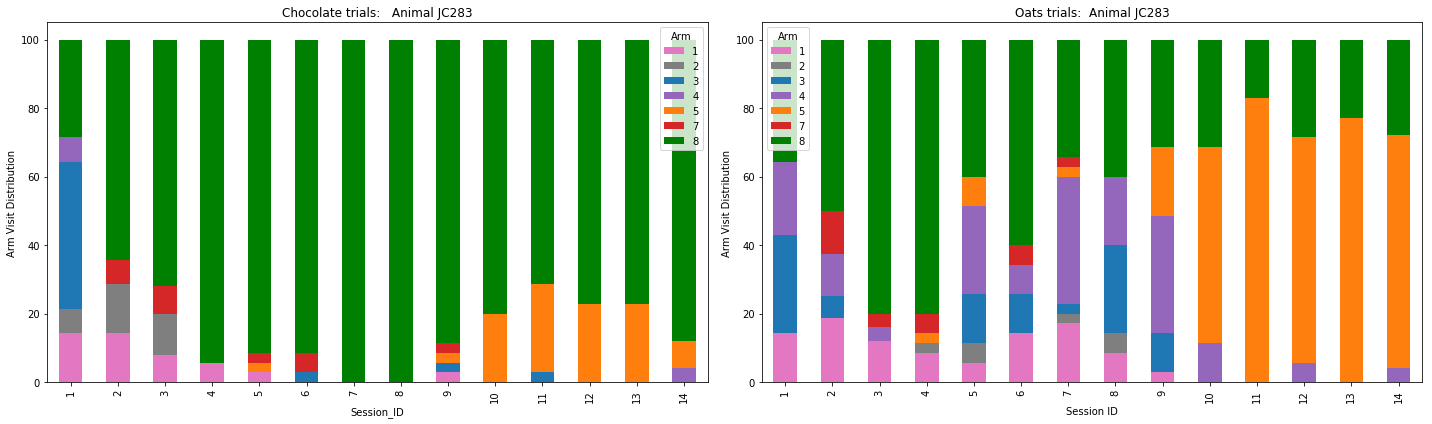

In [76]:
for animal in animals:
    df = data[animal]

    # Create two subplots, one for each 'correct' value
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharex=True)
    
    # Create a custom color mapping for arm numbers
    arm_colors = {1: 'tab:pink', 2: 'tab:gray', 3: 'tab:blue', 4: 'tab:purple', 5: 'tab:orange', 6: 'tab:brown', 7: 'tab:red', 8: 'green'}


    # Plot for correct=1
    correct_1_df = df[df['Flavor'] == "C"]
    pivot_df_correct_1 = pd.pivot_table(correct_1_df, index='Session_ID', columns='Arm', aggfunc='size', fill_value=0)
    pivot_df_correct_1_percentage = pivot_df_correct_1.div(pivot_df_correct_1.sum(axis=1), axis=0) * 100
    pivot_df_correct_1_percentage.plot(kind='bar', stacked=True, ax=axes[0], color=[arm_colors.get(x, 'black') for x in pivot_df_correct_1_percentage.columns])
    axes[0].set_ylabel('Arm Visit Distribution')
    axes[0].set_title('Chocolate trials:   Animal '+animal)

    # Plot for correct=0
    correct_0_df = df[df['Flavor'] == "H"]
    if animal =="JC283":
        correct_0_df = df[df['Flavor'] == "S"]
    pivot_df_correct_0 = pd.pivot_table(correct_0_df, index='Session_ID', columns='Arm', aggfunc='size', fill_value=0)
    pivot_df_correct_0_percentage = pivot_df_correct_0.div(pivot_df_correct_0.sum(axis=1), axis=0) * 100
    pivot_df_correct_0_percentage.plot(kind='bar', stacked=True, ax=axes[1], color=[arm_colors.get(x, 'black') for x in pivot_df_correct_0_percentage.columns])
    axes[1].set_ylabel('Percentage')
    axes[1].set_ylabel('Arm Visit Distribution')
    axes[1].set_title('Oats trials:  Animal '+animal)

    plt.xlabel('Session ID')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.show()


In [75]:
data["JC283"]

,Session_ID,Flavor,Arm,Correct,CorrectBool
0,1,C,8,Y,1
1,1,C,3,N,0
2,1,C,3,N,0
3,1,C,1,N,0
4,1,C,2,N,0
5,1,C,8,Y,1
6,1,S,3,N,0
7,1,S,8,N,0
8,1,S,3,N,0
9,1,S,8,N,0


In [25]:
for animal in animals:
    print(animal)
    df = data[animal]
    for i in (sessions[animal]):
        print(len(df.loc[df['Session_ID'] == i]))

JC258
26
7
30
50
70
70
70
70
70
70
69
69
49
JC267
30
26
50
JC274
18
30
52
70
70
70
70
70
70
70
70
71
JC283
28
30
50
70
70
70
70
70
70
70
70
70
70
75


# Plotting

## Plot accuracy before rule change

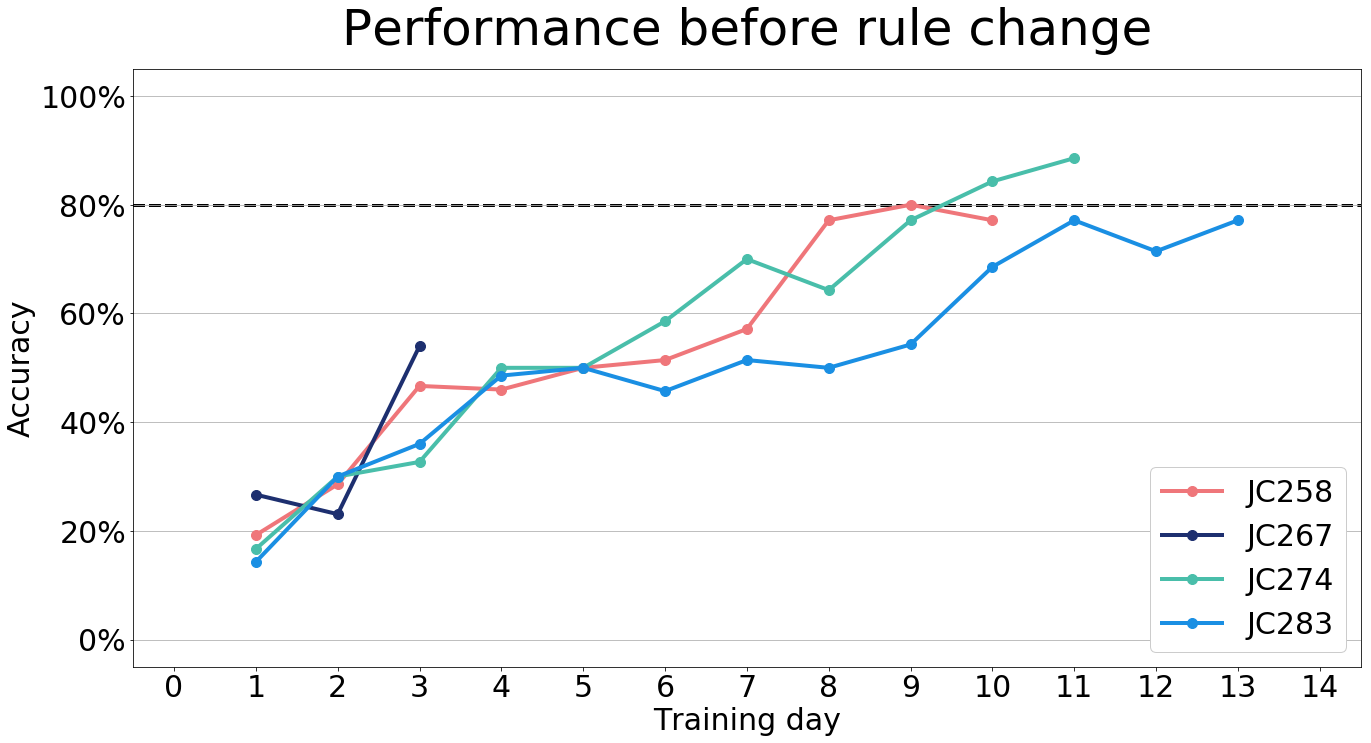

In [7]:
fig, ax = plt.subplots(figsize=(22,11))
title='Performance before rule change'

for animal in animals:
    acc = accuracy[animal].iloc[:rule_change[animal]-1] # accuracy before rule change
    plot_accuracy(acc,
                  animal,
                  ndays=14,
                  title=title,
                  fig=fig,
                  ax=ax)

# save_fig(title, 'svg')

## Plot accuracy after rule change

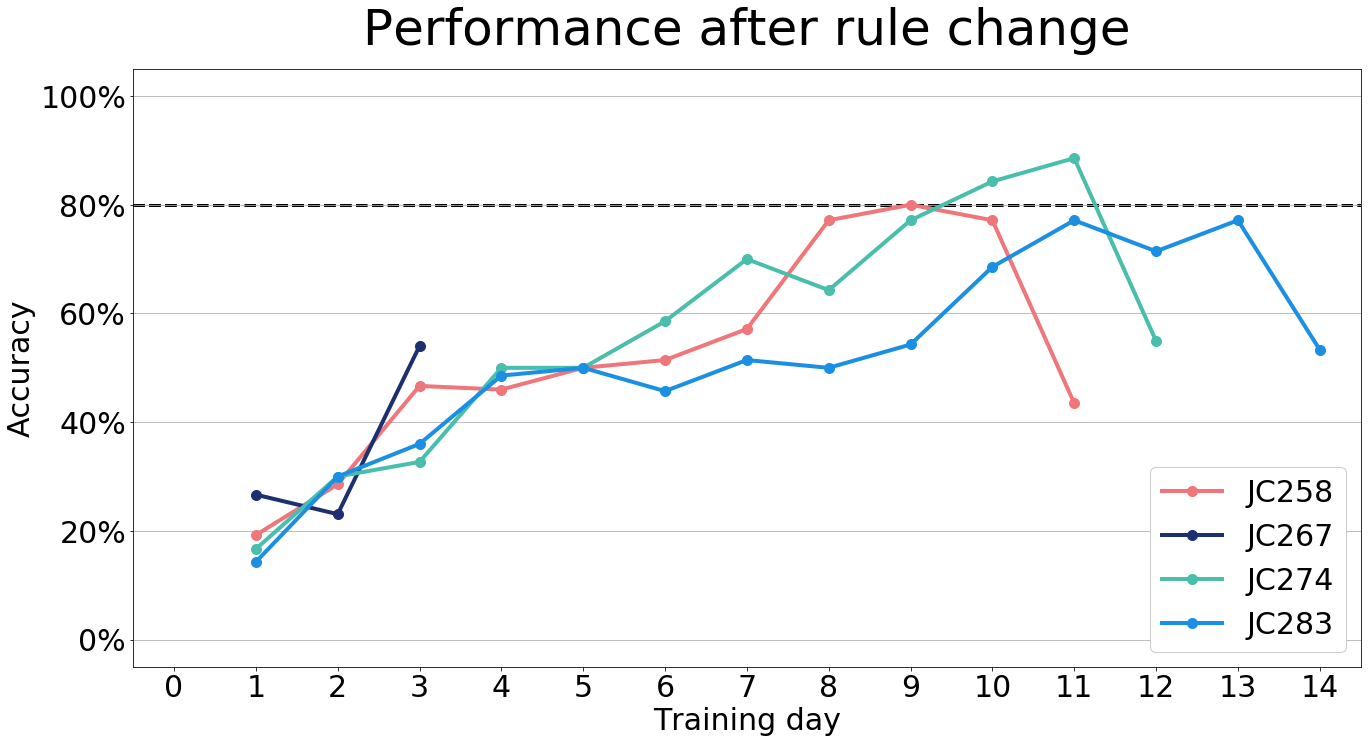

In [8]:
fig, ax = plt.subplots(figsize=(22,11))
title='Performance after rule change'

for animal in animals:
    acc = accuracy[animal].iloc[:rule_change[animal]] # accuracy before rule change
    plot_accuracy(acc,
                  animal,
                  ndays=14,
                  title=title,
                  fig=fig,
                  ax=ax)
    
# save_fig(title, 'svg')

## Plot performance by cue type (all animals)

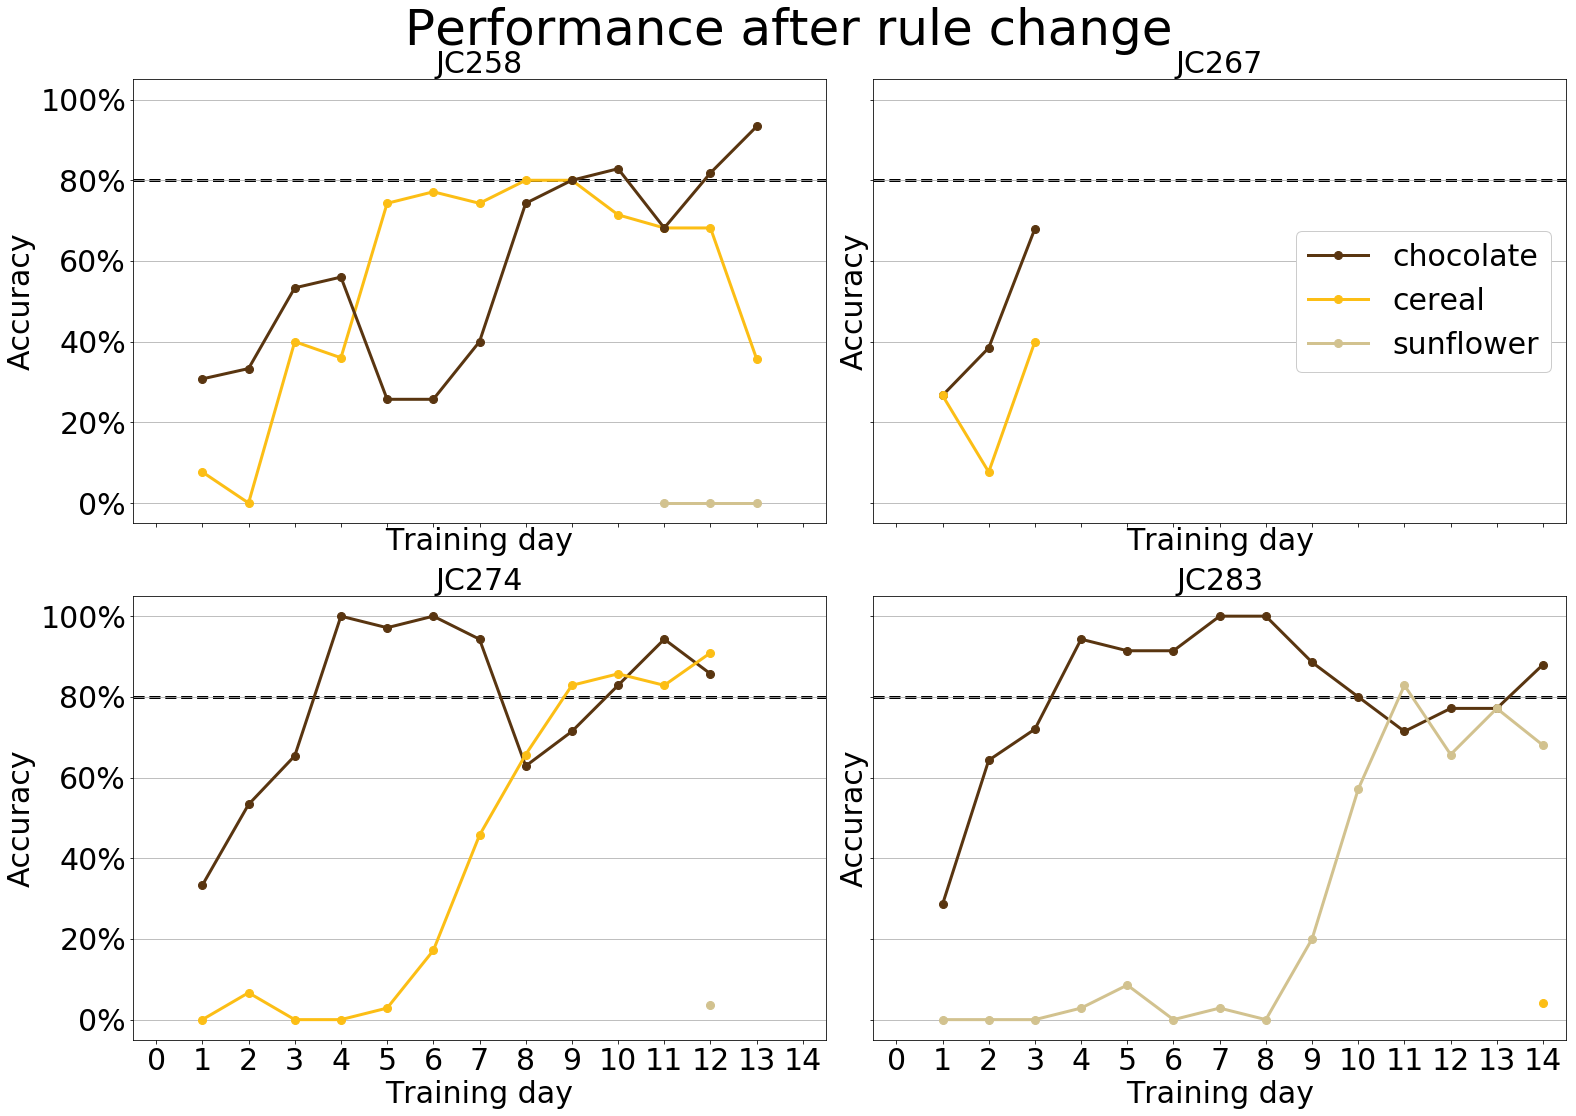

In [9]:
ndays=14 # set the number of days to plot

# Make a large plot with 4 subplots
rows, cols = 2, 2
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(22,15))
fig.suptitle(title, fontsize=50, y=1.03)
title='Performance by cue type'

# Iterate over each subplot and plot
for ax, animal in zip(axes.flatten(), animals):
    plot_accuracy_by_cue(accuracy_by_cue[animal],
                         animal,
                         cues[animal],
                         ndays,
                         ax)
    
    # Plot legend on JC267 subplot
    if animal == 'JC267':
        legend_handles = []
        for cue, color in cue_names.items():
            legend_handles.append(plt.Line2D([],[], color=color, label=cue, linewidth=3, marker='o', markersize=8))
        ax.legend(handles=legend_handles, loc=7, fontsize=30, framealpha=1)

## Plot performance by cue type (individual animals)

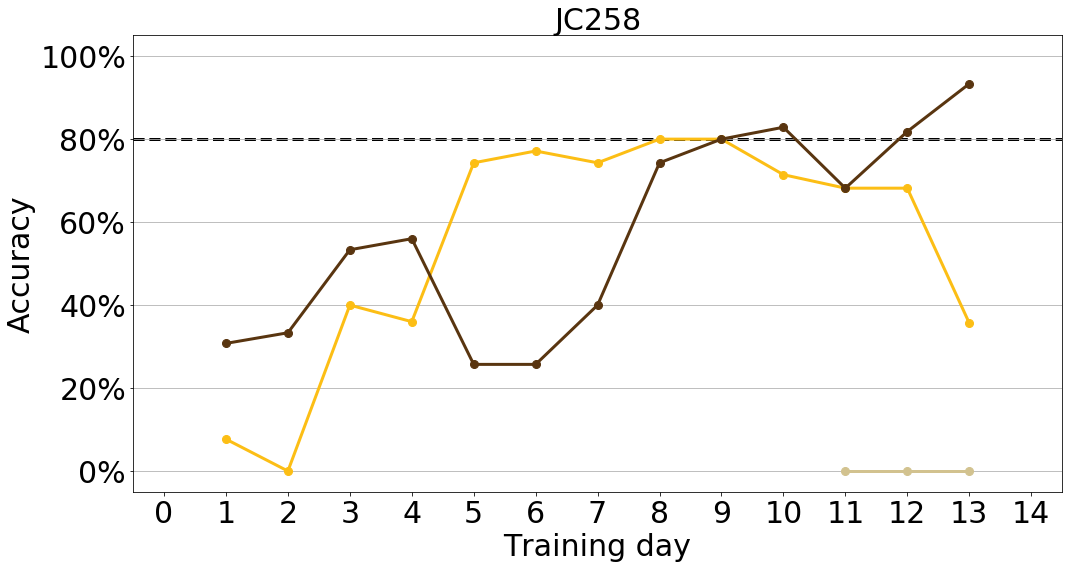

In [10]:
animal='JC258'
plot_accuracy_by_cue(accuracy_by_cue[animal],
                     animal,
                     cues[animal],
                     ndays,
                    )

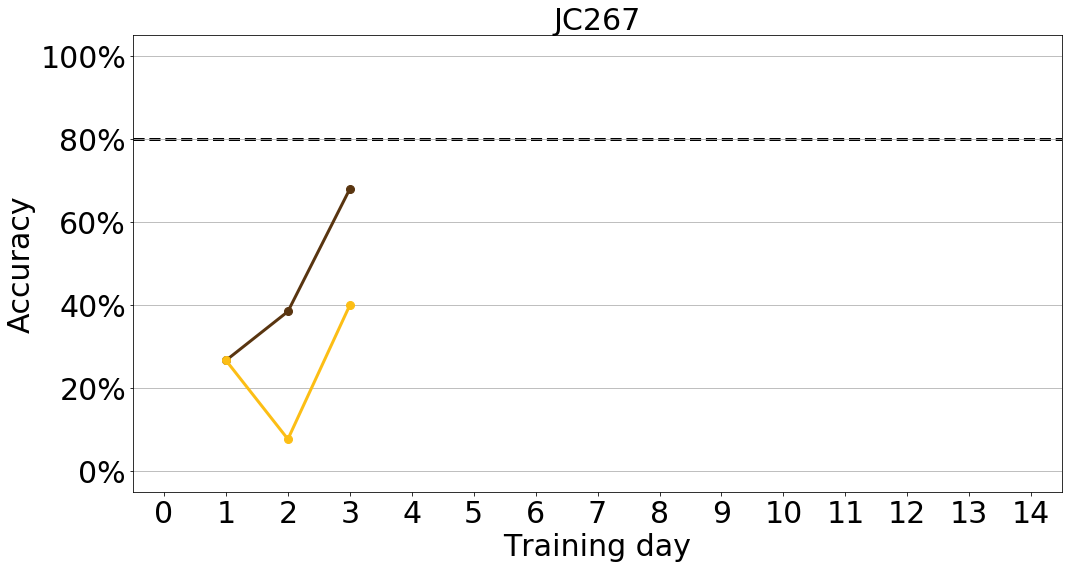

In [11]:
animal='JC267'
plot_accuracy_by_cue(accuracy_by_cue[animal],
                     animal,
                     cues[animal],
                     ndays,
                    )

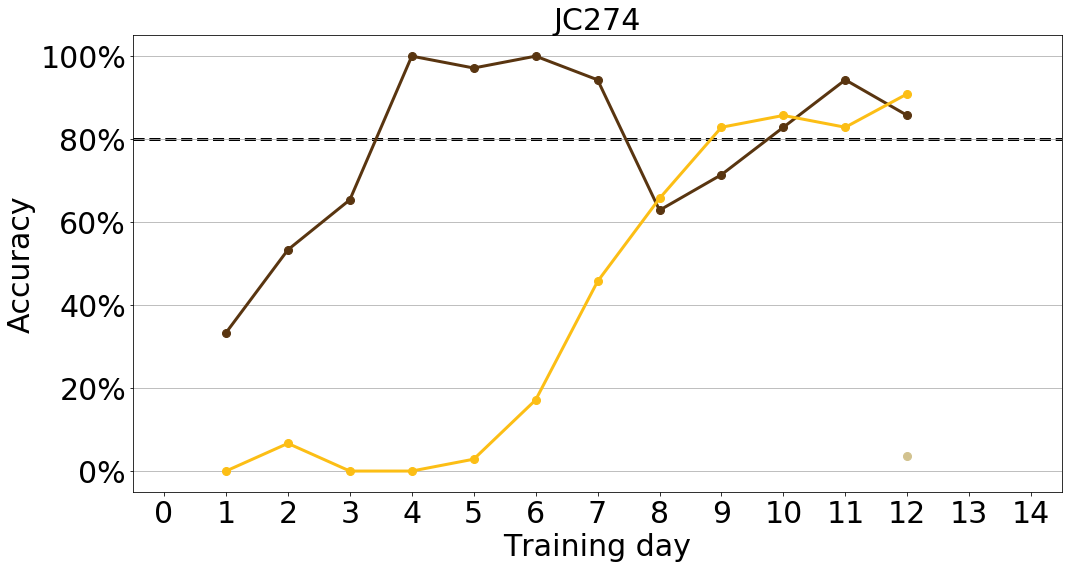

In [12]:
animal='JC274'
plot_accuracy_by_cue(accuracy_by_cue[animal],
                     animal,
                     cues[animal],
                     ndays,
                    )

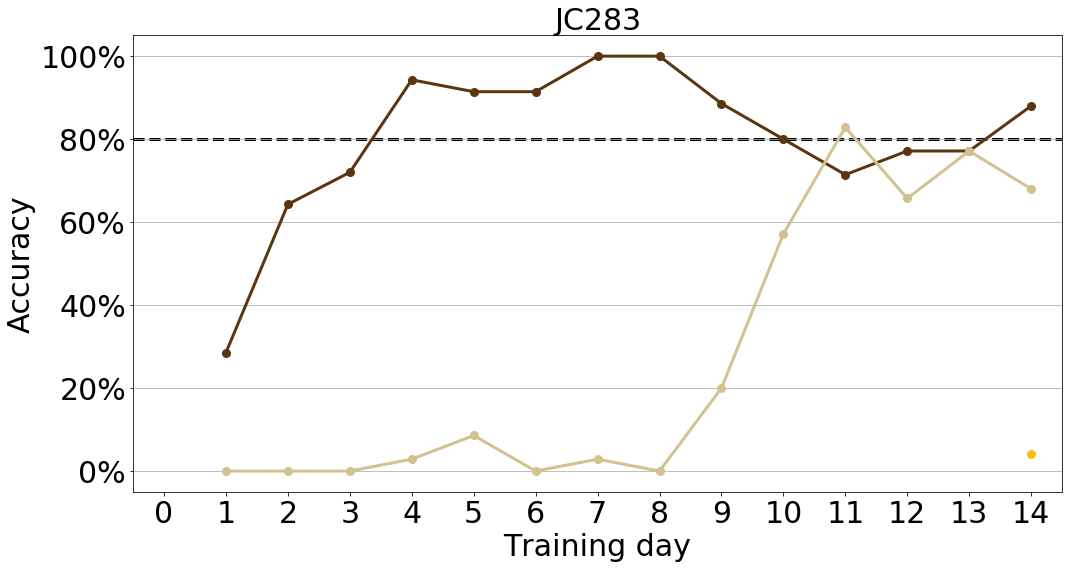

In [13]:
animal='JC283'
plot_accuracy_by_cue(accuracy_by_cue[animal],
                     animal,
                     cues[animal],
                     ndays,
                    )